# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
#from eofs.xarray import Eof 

In [2]:
import cftime
import scipy

In [3]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import make_multisimulation_dataset

In [4]:
from load_ensembles import *
import quick_map

In [5]:
path_in='/glade/work/czarakas/coupled_PPE/data/data_for_figures/'

# Load data

In [6]:
ds_Ts = xr.open_dataset(path_in+'delta_TSKIN_Annual_mean.nc')['TSKIN']

In [7]:
ds = xr.open_dataset(path_in+'delta_calculated_PRECT_Annual_mean.nc')['calculated_PRECT']
from load_gridcell_areas import *

In [8]:
pvals=xr.open_dataset(path_in+'pval_calculated_PRECT_Annual_mean.nc')['pval']

In [9]:
ds_ref=xr.open_dataset(path_in+'ref_calculated_PRECT_Annual_mean.nc')['calculated_PRECT']

In [10]:
landweights=landweights.reindex_like(ds_ref, method='nearest',tolerance=0.05)

In [ ]:
pvals_Ts=xr.open_dataset(path_in+'pval_TSKIN_Annual_mean.nc')['pval']

# Do some calculations

In [11]:
val_range=ds.max(dim='ensemble_key')-ds.min(dim='ensemble_key')
val_range_mmyear=val_range*86400*365

# Figure S11

In [12]:
mapdata=val_range_mmyear=val_range*86400*365
sigmask=((pvals<=0.05).sum(dim='ensemble_key')<=5)

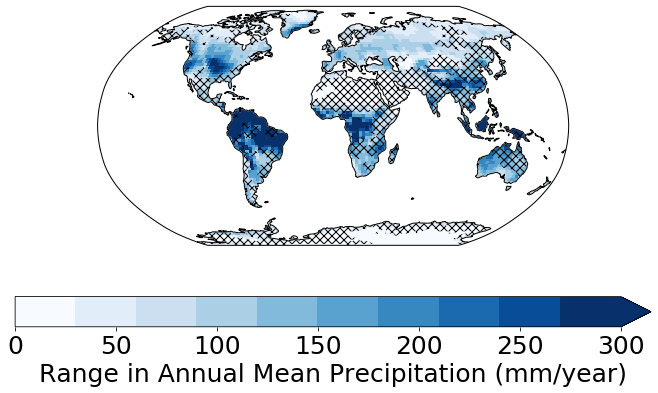

In [13]:
import cartopy
plt.rcParams.update({'font.size': 25})
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=mapdata.lon)

plt.pcolormesh(cyclic_lons, mapdata.lat, #contourf
                   cyclic_data, 
                   cmap=plt.cm.get_cmap("Blues",10), vmin=0, vmax=300,#levels=np.arange(-100,100),
                   transform=ccrs.PlateCarree())
plt.colorbar(extend='max', orientation='horizontal',
            label='Range in Annual Mean Precipitation (mm/year)')#, ticks=np.arange(-0.025, 0.030, 0.005))

cyclic_data_mask, cyclic_lons_mask = add_cyclic_point(sigmask, coord=sigmask.lon)
ax.contourf(
            cyclic_lons_mask, sigmask.lat, cyclic_data_mask,
            transform=ccrs.PlateCarree(),
            colors='none',
            levels=[0.5, 1.5],
            hatches=['xxx'])
        
plt.tight_layout()
ax.add_feature(cartopy.feature.OCEAN, facecolor='white', zorder=1)
ax.coastlines()
plt.savefig('Figures/PRECT_range_absolute_change.eps')
plt.savefig('Figures/PRECT_range_absolute_change.png')

# Figure S9

In [16]:
pct_decrease_Ts=(((pvals_Ts<=0.05)&(ds_Ts<0))*landweights).mean(dim=['lat','lon'])*100
pct_increase_Ts=(((pvals_Ts<=0.05)&(ds_Ts>0))*landweights).mean(dim=['lat','lon'])*100
pct_decrease_P=(((pvals<=0.05)&(ds<0))*landweights).mean(dim=['lat','lon'])*100
pct_increase_P=(((pvals<=0.05)&(ds>0))*landweights).mean(dim=['lat','lon'])*100

In [17]:
from plotting_settings import *

In [44]:
zeta_ind=(crosswalk.param=='zetamaxstable').values

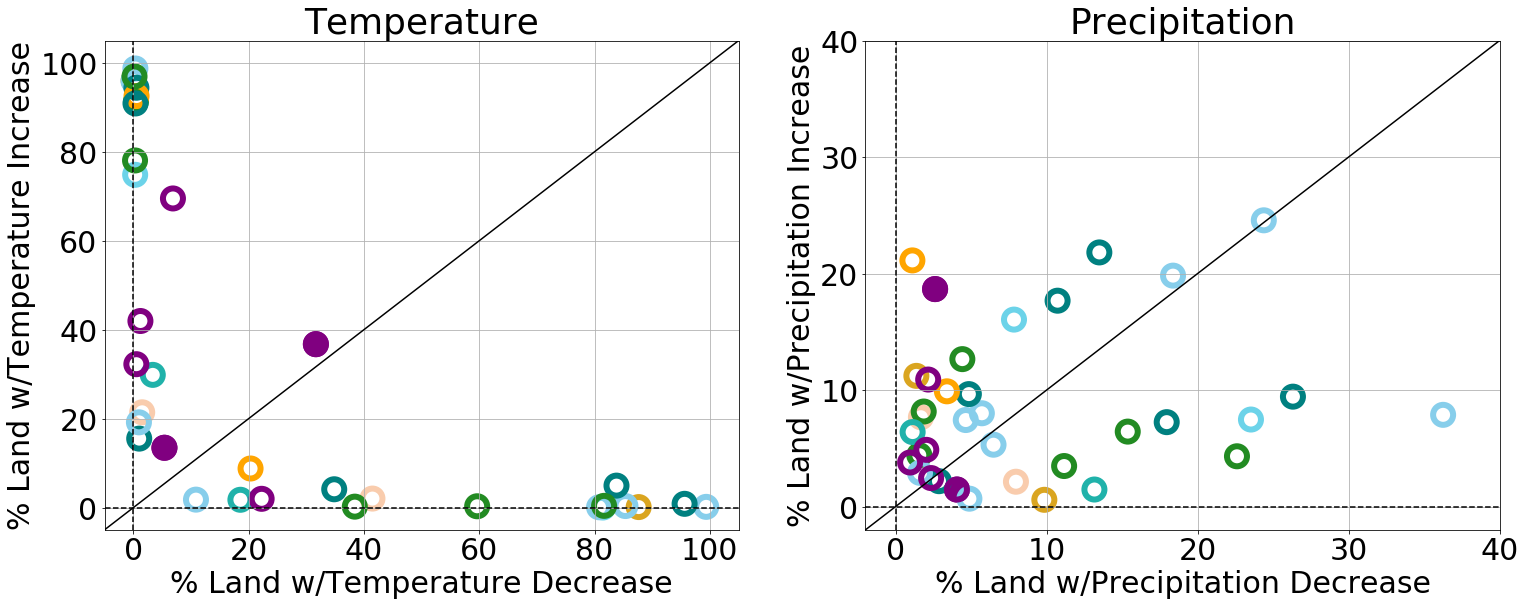

In [55]:
plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(25,9))

plt.subplot(1,2,1)
plt.scatter(pct_decrease_Ts[zeta_ind], pct_increase_Ts[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.scatter(pct_decrease_Ts, pct_increase_Ts, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('% Land w/Temperature Decrease')
plt.ylabel('% Land w/Temperature Increase')
plt.plot([-5,105],[-5,105],'-k')
plt.xlim([-5,105])
plt.ylim([-5,105])
plt.title('Temperature')

plt.subplot(1,2,2)


plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.scatter(pct_decrease_P[zeta_ind], pct_increase_P[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.scatter(pct_decrease_P, pct_increase_P, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.xlabel('% Land w/Precipitation Decrease')
plt.ylabel('% Land w/Precipitation Increase')
plt.plot([-2,40],[-2,40],'-k')
plt.xlim([-2,40])
plt.ylim([-2,40])
plt.title('Precipitation')
plt.savefig('Figures/S9_Percentage_Sign_Change.png')

# Figure S8

In [57]:
pct_change_Ts=(((pvals_Ts<=0.05))*landweights).mean(dim=['lat','lon'])*100
pct_change_P=(((pvals<=0.05))*landweights).mean(dim=['lat','lon'])*100

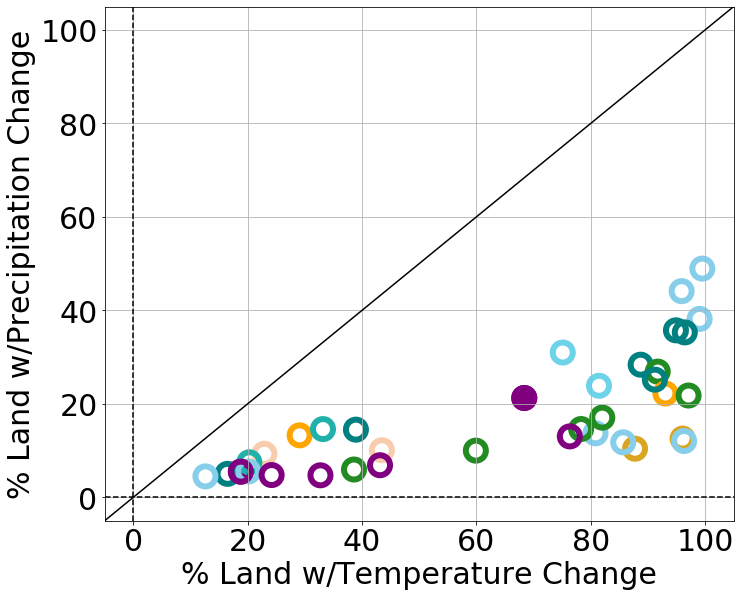

In [66]:
plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(11,9))

plt.scatter(pct_change_Ts[zeta_ind], pct_change_P[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.scatter(pct_change_Ts, pct_change_P, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('% Land w/Temperature Change')
plt.ylabel('% Land w/Precipitation Change')
plt.plot([-5,105],[-5,105],'-k')
plt.xlim([-5,105])
plt.ylim([-5,105])
plt.tight_layout()
plt.savefig('Figures/S8.png')